#### <font color='red'>Runs in Python [conda env:tv-scripts-project]. Jupyter server must be running in the same envorioment too for tensorflow to run

# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

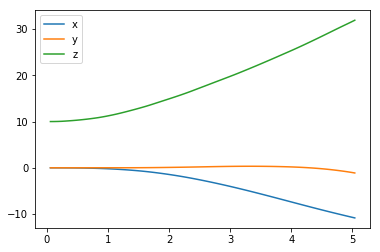

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

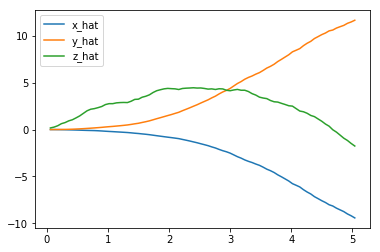

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

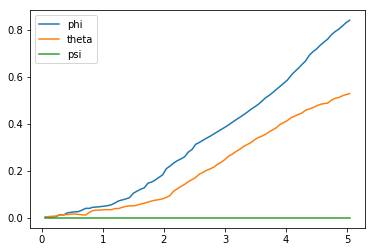

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

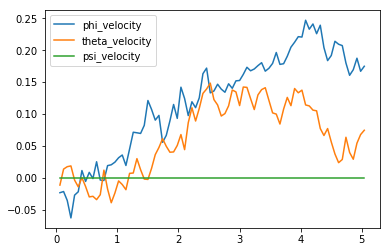

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

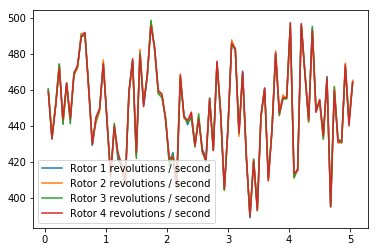

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-13.91669904  20.36267298  23.25699018   0.84071069   0.52889349
   0.        ]
[-9.41618407 11.64987134 -1.75405959]
[0.17482489 0.07444695 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).

<font color='red'>HS:This is just like stacking 4 frames together to show a sequence. <br> From paper: in order to make the problems approximately fully observable in the high dimensional environment we used action repeats. For each timestep of the agent, we step the simulation 3 timesteps, repeating the agent’s action and rendering each time. Thus the observation reported to the agent contains 9 feature maps (the RGB of each of the 3 renderings) which allows the agent to infer velocities using the differences between frames. </font>

- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`. <font color='red'> The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation. </font>

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [4]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) #hs this just returns the best action (=rotor speeds) 
        next_state, reward, done = task.step(action) #reward is distance from target
        agent.step(reward, done)
        state = next_state
        if done: #time has expired, or pos is out of sim bounds
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.451 (best =  -0.056), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

<font color='green'>self.state_size = self.action_repeat * 6 <br> We set the number of elements in the state vector to 6. For the sample task, we only work with the 6-dimensional pose information. To set the size of the state (state_size), we must take action repeats into account. <br><br>
The environment will always have a 4-dimensional action space, with one entry for each rotor (action_size=4). You can set the minimum (action_low) and maximum (action_high) values of each entry here.</font>

In [35]:
import random

%load_ext autoreload
%autoreload 2
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#HS experience replay buffer
from collections import deque

class Memory():
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
            
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [17]:
# HS hyper params
action_size = 4
state_size = 6
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.0001  

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 20                # experience mini-batch size
pretrain_length = batch_size   # number experiences to pretrain the memory

train_episodes = 1000  

train_episodes = 1000          # max number of episodes to learn from
gamma = 0.99                   # future reward discount

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

####hs Load the experience buffer using the random actions taken by Policy agent:

In [18]:
from physics_sim import PhysicsSim

class hsTask():
    """Task (environment) that defines the goal and provides feedback to the agent."""
    def __init__(self, init_pose=None, init_velocities=None, 
        init_angle_velocities=None, runtime=5., target_pos=None):
        """Initialize a Task object.
        Params
        ======
            init_pose: initial position of the quadcopter in (x,y,z) dimensions and the Euler angles
            init_velocities: initial velocity of the quadcopter in (x,y,z) dimensions
            init_angle_velocities: initial radians/second for each of the three Euler angles
            runtime: time limit for each episode
            target_pos: target/goal (x,y,z) position for the agent
        """
        # Simulation
        self.sim = PhysicsSim(init_pose, init_velocities, init_angle_velocities, runtime) 
        self.action_repeat = 1 # hs before it was 3

        self.state_size = self.action_repeat * 6
        self.action_low = 0
        self.action_high = 900
        self.action_size = 4

        # Goal
        self.target_pos = target_pos if target_pos is not None else np.array([0., 0., 10.]) 

    def get_reward(self):
        """Uses current pose of sim to return reward."""
        reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()
        return reward

    def step(self, rotor_speeds):
        #print("hs rotor speeds:\n", rotor_speeds)
        done = self.sim.next_timestep(rotor_speeds) # update the sim pose and velocities
        reward = self.get_reward() 
        next_state = self.sim.pose
        return next_state, reward, done

    def reset(self):
        """Reset the sim to start a new episode."""
        self.sim.reset()
        state = np.concatenate([self.sim.pose] * self.action_repeat) 
        return state

In [25]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

#setup buffer:
memory = Memory(max_size=memory_size)

for i_episode in range(1, pretrain_length+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) #hs this just returns the best action (=rotor speeds) 
        next_state, reward, done = task.step(action) #reward is distance from target
        agent.step(reward, done)
        
        #print("actionTobeAdded To memory:\n", action)
        memory.add((state, action, reward, next_state))
        
        state = next_state
        if done: #time has expired, or pos is out of sim bounds
            print("\rTimeStep = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

actionTobeAdded To memory:
 [ 324.42273718  465.5013436  -624.37586709  384.75439909]
actionTobeAdded To memory:
 [ 331.59179959  988.820155   -998.60730274  323.08489127]
actionTobeAdded To memory:
 [ 177.87227822  516.91809529 -585.07376725 -676.59392421]
actionTobeAdded To memory:
 [ 209.17841525  915.1926686  -881.0449258  -548.80497646]
actionTobeAdded To memory:
 [  265.31645337  1057.65608687 -1009.05645893  -193.09387398]
actionTobeAdded To memory:
 [ 172.24432046  626.68527416 -655.49698078 -775.44619131]
actionTobeAdded To memory:
 [ 173.20686908  545.638865   -597.98515422 -758.05682333]
actionTobeAdded To memory:
 [  296.89866533  1046.18027517 -1015.38440919     6.36846782]
actionTobeAdded To memory:
 [ 238.54673432  812.89422089 -820.58757864 -366.0949024 ]
actionTobeAdded To memory:
 [ 324.9279099   974.9183823  -980.30039061  218.78339272]
actionTobeAdded To memory:
 [ 160.00234038  451.8613733  -526.62223357 -841.48990641]
actionTobeAdded To memory:
 [ 253.7867979   93

TimeStep =    2, score =  -0.207 (best =  -0.207), noise_scale = 0.025actionTobeAdded To memory:
 [ 323.54328381  465.41278917 -625.50759002  384.20472551]
actionTobeAdded To memory:
 [  329.92072776  1032.90674043 -1030.64206804   308.8796438 ]
actionTobeAdded To memory:
 [ 237.84926163  835.58773554 -843.39388608 -309.88342388]
actionTobeAdded To memory:
 [ 255.47450076  558.89285355 -656.49376099 -123.3124056 ]
actionTobeAdded To memory:
 [ 257.2848084   666.66180397 -734.25207244 -127.27360544]
actionTobeAdded To memory:
 [ 290.35317125  851.76069915 -882.12779536   78.48029682]
actionTobeAdded To memory:
 [ 148.06506999  682.77351459 -689.01292525 -891.1196601 ]
actionTobeAdded To memory:
 [ 314.6744006   910.68199205 -935.45039815  272.71502516]
actionTobeAdded To memory:
 [ 160.66919251  653.90718667 -673.93832049 -758.28862922]
actionTobeAdded To memory:
 [ 209.22006432  682.32702634 -717.16481365 -403.02143795]
actionTobeAdded To memory:
 [ 268.4816105   902.74608649 -901.4599

TimeStep =    4, score =  -0.529 (best =  -0.207), noise_scale = 0.1actionTobeAdded To memory:
 [ 324.7584403   464.02772391 -623.53893864  384.39651898]
actionTobeAdded To memory:
 [ 336.42982439  969.21607001 -988.39607076  364.27129999]
actionTobeAdded To memory:
 [ 159.03957546  481.11101819 -549.01529999 -815.27232373]
actionTobeAdded To memory:
 [ 174.41835061  772.43487281 -761.58970108 -777.74729577]
actionTobeAdded To memory:
 [ 305.04735127  840.95065775 -875.17588303  126.38577008]
actionTobeAdded To memory:
 [ 316.37945714  683.33864372 -766.02780241  218.68449638]
actionTobeAdded To memory:
 [ 326.29416568  507.30666236 -643.22253847  313.26083806]
actionTobeAdded To memory:
 [ 322.75497454 1009.91681981 -996.23037988  178.59207522]
actionTobeAdded To memory:
 [ 189.23654831  727.89588619 -724.77870332 -724.00731059]
actionTobeAdded To memory:
 [  145.22154      589.26940486  -600.88618804 -1014.50609003]
actionTobeAdded To memory:
 [ 268.78197393  926.0394546  -902.170615

TimeStep =    6, score =  -0.458 (best =  -0.207), noise_scale = 0.4actionTobeAdded To memory:
 [ 325.56367141  459.41842716 -627.36291657  389.68206371]
actionTobeAdded To memory:
 [ 152.41254223  959.79396562 -891.38300921 -922.82271215]
actionTobeAdded To memory:
 [ 313.05429414  546.85599599 -681.74268842  276.77028531]
actionTobeAdded To memory:
 [ 175.41194657  834.62497372 -811.49075755 -762.83937474]
actionTobeAdded To memory:
 [ 199.04045625  477.74436126 -568.21670949 -553.20008848]
actionTobeAdded To memory:
 [ 153.46975369  469.66298026 -535.52957166 -902.19883936]
actionTobeAdded To memory:
 [  322.34926576  1031.80395964 -1022.19034242   168.99326713]
actionTobeAdded To memory:
 [ 189.56043342 1020.89203879 -941.39218441 -798.46135353]
actionTobeAdded To memory:
 [ 279.87099909  498.87268886 -615.0865025  -101.32615786]
actionTobeAdded To memory:
 [ 240.39391999  546.96117134 -624.95854977 -427.15084047]
actionTobeAdded To memory:
 [ 218.6504161   457.89383807 -545.987745

TimeStep =    8, score =  -0.861 (best =  -0.207), noise_scale = 1.6actionTobeAdded To memory:
 [ 341.81484252  436.26749907 -641.5372956   367.69539289]
actionTobeAdded To memory:
 [ 259.34592899  655.14740935 -747.51241828 -274.88202619]
actionTobeAdded To memory:
 [ 281.36464098  857.06193837 -897.35625616 -156.37050276]
actionTobeAdded To memory:
 [ 210.97330836 1015.84479337 -968.28358725 -695.00818963]
actionTobeAdded To memory:
 [ 334.4304757   879.82142245 -941.43079976  232.80287407]
actionTobeAdded To memory:
 [ 186.90584988  593.76698809 -665.12215468 -786.75546661]
actionTobeAdded To memory:
 [  266.86814769  1045.99843863 -1016.58196228  -302.61268638]
actionTobeAdded To memory:
 [ 245.36019149  445.17567582 -591.25725506 -346.00046968]
actionTobeAdded To memory:
 [ 323.65944376  444.48015787 -630.99134538  221.08986133]
actionTobeAdded To memory:
 [ 288.11411206  776.39960614 -837.8374257  -102.65075082]
actionTobeAdded To memory:
 [ 287.59164202  602.43072921 -716.682671

TimeStep =   10, score =  -0.325 (best =  -0.207), noise_scale = 3.2actionTobeAdded To memory:
 [ 326.51201322  450.48385799 -656.96830478  326.42918371]
actionTobeAdded To memory:
 [ 205.4285041   954.76097849 -930.94189683 -780.91587251]
actionTobeAdded To memory:
 [ 191.17756792  570.24058985 -686.63780437 -700.11560772]
actionTobeAdded To memory:
 [ 181.46553668  597.48121521 -699.84192072 -803.00582612]
actionTobeAdded To memory:
 [  157.88394412   695.54626668  -752.62563151 -1046.29083873]
actionTobeAdded To memory:
 [  360.03698286  1039.91040688 -1034.08415146   188.47269368]
actionTobeAdded To memory:
 [ 158.4914895   455.71880909 -604.06169231 -974.42518367]
actionTobeAdded To memory:
 [  149.71012417   507.93057824  -633.88510299 -1087.05380494]
actionTobeAdded To memory:
 [ 254.9295796   453.24712179 -635.94438161 -337.26286339]
actionTobeAdded To memory:
 [ 243.52116524  630.21905249 -744.30888066 -524.22754422]
actionTobeAdded To memory:
 [  382.17871217   974.00138552 -

TimeStep =   12, score =  -0.278 (best =  -0.207), noise_scale = 3.2actionTobeAdded To memory:
 [ 361.7906098   475.86330994 -621.99486348  345.6026058 ]
actionTobeAdded To memory:
 [ 253.63215017 1015.1434443  -963.73149101 -722.5016298 ]
actionTobeAdded To memory:
 [ 288.60624901  835.95094959 -849.49949864 -382.71501736]
actionTobeAdded To memory:
 [ 220.06642471  628.13470349 -662.79762399 -763.47060893]
actionTobeAdded To memory:
 [ 236.79102243  940.9415224  -902.4555582  -836.06677654]
actionTobeAdded To memory:
 [ 391.32633531  791.11404704 -870.86941172  312.84137506]
actionTobeAdded To memory:
 [ 251.01822719  987.23927483 -943.83583818 -824.64334425]
actionTobeAdded To memory:
 [ 263.49498617  829.68174885 -833.06461445 -691.67022749]
actionTobeAdded To memory:
 [ 397.07568977  609.68733615 -736.8536538   317.52684439]
actionTobeAdded To memory:
 [ 351.05075631  844.23663031 -884.8988187  -199.73124431]
actionTobeAdded To memory:
 [ 337.06537742  985.79984536 -982.35852454 -

TimeStep =   14, score =  -0.423 (best =  -0.207), noise_scale = 3.2actionTobeAdded To memory:
 [ 329.54999966  495.53248229 -638.99039493  385.15400089]
actionTobeAdded To memory:
 [ 236.37555678  861.02816985 -861.26855253 -420.75901367]
actionTobeAdded To memory:
 [ 185.37749249  520.41984152 -623.96526725 -585.41787375]
actionTobeAdded To memory:
 [ 157.52572635  562.26540374 -646.80774613 -793.10431612]
actionTobeAdded To memory:
 [ 158.36173583  698.05299288 -738.71811941 -862.84998482]
actionTobeAdded To memory:
 [  356.76310617  1053.03971232 -1021.41516967   265.77735252]
actionTobeAdded To memory:
 [ 206.65283204  561.05346086 -662.57754088 -490.30628281]
actionTobeAdded To memory:
 [ 343.1464525   626.4080774  -737.96893917  372.29426746]
actionTobeAdded To memory:
 [ 335.97807043  973.66389807 -968.8864877   136.54161226]
actionTobeAdded To memory:
 [ 166.6777888   679.998974   -737.13948105 -843.73153005]
actionTobeAdded To memory:
 [ 237.64111338  491.20743683 -628.823787

TimeStep =   16, score =  -0.543 (best =  -0.207), noise_scale = 3.2actionTobeAdded To memory:
 [ 351.90203934  471.74776882 -600.36173027  356.74944062]
actionTobeAdded To memory:
 [ 160.39636339  779.14977063 -717.64303391 -815.16171335]
actionTobeAdded To memory:
 [  125.29958932   715.79765381  -652.744042   -1012.94658606]
actionTobeAdded To memory:
 [ 176.47460623  717.25804867 -681.62058931 -720.7344214 ]
actionTobeAdded To memory:
 [ 346.453874    827.76736832 -853.87916672  243.85562883]
actionTobeAdded To memory:
 [ 149.41064805  893.97104211 -794.10971444 -929.63800101]
actionTobeAdded To memory:
 [ 145.17397193  639.75629545 -606.30781537 -929.35578212]
actionTobeAdded To memory:
 [ 321.71302926  903.56978047 -888.88081933   27.82815168]
actionTobeAdded To memory:
 [ 344.75751568  876.05531024 -879.01923701  144.76809055]
actionTobeAdded To memory:
 [ 188.12717918  877.97705427 -791.84396878 -788.23782077]
actionTobeAdded To memory:
 [ 317.2126315   869.48419062 -851.065056

TimeStep =   18, score =  -0.327 (best =  -0.207), noise_scale = 3.2actionTobeAdded To memory:
 [ 326.33690628  447.29444956 -665.10869985  383.52465784]
actionTobeAdded To memory:
 [ 202.33239605  596.03500036 -694.52215194 -633.64735801]
actionTobeAdded To memory:
 [ 184.46886767  893.74693969 -878.88336483 -961.05596851]
actionTobeAdded To memory:
 [ 314.48799251  882.51470998 -940.46731043   -4.95845033]
actionTobeAdded To memory:
 [ 235.11915936  894.20904412 -901.27148291 -623.12820056]
actionTobeAdded To memory:
 [ 169.3700869   459.19992422 -578.29540421 -853.01241474]
actionTobeAdded To memory:
 [ 308.4061028   500.32953899 -678.11222311  129.0599408 ]
actionTobeAdded To memory:
 [ 327.89549307  895.07047742 -943.72583762   -2.58661219]
actionTobeAdded To memory:
 [ 305.36996175  633.71417724 -758.5035482   -18.07989455]
actionTobeAdded To memory:
 [ 298.64861347  585.97944509 -721.38278408  -42.75666748]
actionTobeAdded To memory:
 [ 297.31517093  997.6177216  -986.72616082 -

In [20]:
print(len(memory.buffer))

1480


In [21]:
class QNetwork:
    def __init__(self, learning_rate, state_size, action_size, hidden_size, name='QNetwork'):
        # state inputs to the Q-network
        with tf.variable_scope(name):
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            
            self.actions_ = tf.placeholder(tf.int32, [None, action_size], name='actions')
            
            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None, action_size], name='target')
            
            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.fully_connected(self.fc1, hidden_size)

            # Linear output layer
            self.output = tf.contrib.layers.fully_connected(self.fc2, action_size, 
                                                            activation_fn=None)
            
            ### Train with loss (targetQ - Q)^2
            # output has length 2, for two actions. This next line chooses
            # one value from output (per row) according to the one-hot encoded actions.
            '''
            self.Q = tf.reduce_sum(tf.multiply(self.output, one_hot_actions), axis=1)
            
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.Q))
            '''
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.output))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [22]:
tf.reset_default_graph()
mainQN = QNetwork(learning_rate, state_size, action_size, hidden_size, 'main')

In [29]:
batch = memory.sample(batch_size)
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
next_states = np.array([each[3] for each in batch])

In [31]:
print(action_size)

4


In [20]:
ar1 = np.array([[1,2,3,4]])
ar2 = ar1.reshape((4,))
print(ar1.shape)
print(ar2.shape)
print(ar2)

(4,)
(4,)
[1 2 3 4]


In [ ]:
######################################
########### VER 3 ####################
######################################

## TODO: Train your agent here.
import sys
import pandas as pd
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
#task = Task(target_pos=target_pos)
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 


# Now train with experiences
saver = tf.train.Saver()
rewards_list = []

with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        state = agent.reset_episode() # start a new episode
        total_reward = 0

        while True:
            step += 1
            
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = agent.act(state)
            else:
                # Get action from Q-network
                feed = {mainQN.inputs_: state.reshape((1, *state.shape))}
                action = sess.run(mainQN.output, feed_dict=feed)
            
            # Take action, get new state and reward
            #print("actionShape:\n", action.shape)
            next_state, reward, done = task.step(action.reshape((action_size,)))
            #print("done:\n", done)
    
            total_reward += reward
            
            if done:
                # the episode ends so no next state
                next_state = np.zeros(state.shape)
                rewards_list.append((ep, total_reward))
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                
                break

            # Add experience to memory
            #print("actionTobeAdded To memory:\n", action)
            memory.add((state, action, reward, next_state))
            state = next_state
                
            
            # Sample mini-batch from memory
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            
            # Train network:
            
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = 0
            
            #targets = rewards + gamma * target_Qs
            temp = tf.multiply(gamma, target_Qs)
            targets = tf.add(tf.constant(rewards, dtype=tf.float32, shape=temp.shape), temp)
            
            #print("actionsShape:\n", actions.shape)
            if actions.shape != (batch_size, action_size):
                actions = np.zeros((batch_size, action_size), dtype=float)

            loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                feed_dict={mainQN.inputs_: states,
                                           mainQN.targetQs_: targets.eval(),
                                           mainQN.actions_: actions})
                
        sys.stdout.flush()
        
    saver.save(sess, "checkpoints/hsQuad.ckpt")

Episode: 1 Total reward: -125.39465579819425 Training loss: 0.7201 Explore P: 0.9927
Episode: 2 Total reward: -131.63407588354073 Training loss: 0.8637 Explore P: 0.9854
Episode: 3 Total reward: -124.74199363903462 Training loss: 0.9962 Explore P: 0.9782


In [30]:
######################################
########### VER 2 ####################
######################################

## TODO: Train your agent here.
import sys
import pandas as pd
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
#task = Task(target_pos=target_pos)
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 


# Now train with experiences
saver = tf.train.Saver()
rewards_list = []

with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        state = agent.reset_episode() # start a new episode
        total_reward = 0

        while True:
            step += 1
            
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = agent.act(state)
            else:
                # Get action from Q-network
                feed = {mainQN.inputs_: state.reshape((1, *state.shape))}
                action = sess.run(mainQN.output, feed_dict=feed)
            
            # Take action, get new state and reward
            #print("actionShape:\n", action.shape)
            next_state, reward, done = task.step(action.reshape((action_size,)))
            #print("done:\n", done)
    
            total_reward += reward
            
            if done:
                # the episode ends so no next state
                next_state = np.zeros(state.shape)
                rewards_list.append((ep, total_reward))
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                
                break

            # Add experience to memory
            #print("actionTobeAdded To memory:\n", action)
            memory.add((state, action, reward, next_state))
            state = next_state
                
            
            # Sample mini-batch from memory
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            
            # Train network:
            
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = 0
            
            #targets = rewards + gamma * target_Qs
            temp = tf.multiply(gamma, target_Qs)
            targets = tf.add(tf.constant(rewards, dtype=tf.float32, shape=temp.shape), temp)
            
            #print("actionsShape:\n", actions.shape)
            if actions.shape == (batch_size, action_size):
                loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                    feed_dict={mainQN.inputs_: states,
                                               mainQN.targetQs_: targets.eval(),
                                               mainQN.actions_: actions})
                
        sys.stdout.flush()
        
    saver.save(sess, "checkpoints/hsQuad.ckpt")

Episode: 1 Total reward: -35.8125619629813 Training loss: 1.2772 Explore P: 0.9906
Episode: 2 Total reward: -8.256795046577718 Training loss: 1.4348 Explore P: 0.9828
Episode: 3 Total reward: -13.454423833698057 Training loss: 0.8801 Explore P: 0.9748
Episode: 4 Total reward: -39.71199194697268 Training loss: 2.2338 Explore P: 0.9656
Episode: 5 Total reward: -39.18007794166832 Training loss: 0.4561 Explore P: 0.9564
Episode: 6 Total reward: -23.359244103371225 Training loss: 0.6987 Explore P: 0.9481
Episode: 7 Total reward: -4.9713280964687385 Training loss: 11.1580 Explore P: 0.9400
Episode: 8 Total reward: -30.4770346914361 Training loss: 0.2606 Explore P: 0.9309
Episode: 9 Total reward: -3.1692673880932 Training loss: 1.0273 Explore P: 0.9234
Episode: 10 Total reward: -14.907580031572307 Training loss: 1.2424 Explore P: 0.9159
Episode: 11 Total reward: 5.020988001376809 Training loss: 9.2125 Explore P: 0.9081
Episode: 12 Total reward: -2.7310918982322594 Training loss: 4.3359 Explor

KeyboardInterrupt: 

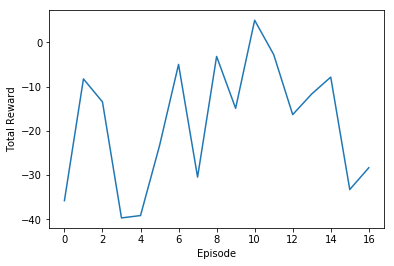

In [48]:
## TODO: Plot the rewards.
eps = np.array(rewards_list)
plt.plot(eps[:,1])
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [27]:
######################################
########### VER 1 ####################
######################################

## TODO: Train your agent here.
import sys
import pandas as pd
#from hsTask import Task

target_pos = np.array([0., 0., 10.])
#task = Task(target_pos=target_pos)
task = hsTask(target_pos=target_pos)
agent = PolicySearch_Agent(task) 


# Now train with experiences
saver = tf.train.Saver()
rewards_list = []

with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        state = agent.reset_episode() # start a new episode
        total_reward = 0

        while True:
            step += 1
            
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = agent.act(state)
            else:
                # Get action from Q-network
                feed = {mainQN.inputs_: state.reshape((1, *state.shape))}
                action = sess.run(mainQN.output, feed_dict=feed)
            
            # Take action, get new state and reward
            #print("actionShape:\n", action.shape)
            next_state, reward, done = task.step(action.reshape((action_size,)))
            #print("done:\n", done)
    
            total_reward += reward
            
            if done:
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                
                # the episode ends so no next state
                next_state = np.zeros(state.shape)
                rewards_list.append((ep, total_reward))
                
                # Add experience to memory
                memory.add((state, action, reward, next_state))
                break

            else:
                # Add experience to memory
                memory.add((state, action, reward, next_state))
                state = next_state
                
            
            # Sample mini-batch from memory
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            
            # Train network:
            
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = 0
            
            #targets = rewards + gamma * target_Qs
            temp = tf.multiply(gamma, target_Qs)
            targets = tf.add(tf.constant(rewards, dtype=tf.float32, shape=temp.shape), temp)
            
            print("actionsShape:\n", actions.shape)
            loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                feed_dict={mainQN.inputs_: states,
                                           mainQN.targetQs_: targets.eval(),
                                           mainQN.actions_: actions})
        sys.stdout.flush()
        
    saver.save(sess, "checkpoints/hsQuad.ckpt")

actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShape:
 (20, 4)
actionsShap

ValueError: setting an array element with a sequence.

In [5]:
## TODO: Train your agent here.
import sys
import pandas as pd
from hsTask import Task

target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

rewards_list = []

for i_episode in range(1, train_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) #hs this just returns the best action (=rotor speeds) 
        next_state, reward, done = task.step(action) #reward is distance from target
        agent.step(reward, done)
        state = next_state
        if done: #time has expired, or pos is out of sim bounds
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            # hs save episode's total rewards
            rewards_list.append(agent.total_reward)
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.062 (best =   0.014), noise_scale = 3.2555

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

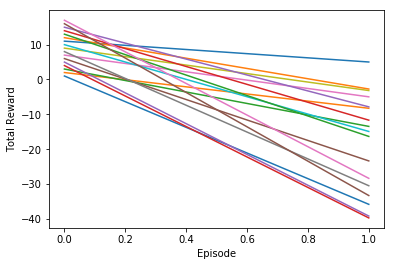

In [36]:
## TODO: Plot the rewards.
eps = np.array(rewards_list).T
plt.plot(eps)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: